# Feature Derivation Notebook

This notebook focuses solely on deriving new features from the combined app dataset. In this notebook, we will:
- Load the combined dataset from `data/combined/combined_apps.csv`.
- Convert and extract date components from the `last_updated_date` column.
- Derive `app_age_days` (number of days since the app was last updated).
- Bin the `installs_clean` variable into discrete categories.
- Create a binary flag (`paid_flag`) for Free vs. Paid apps based on the `type` column.

These new features will be useful for exploratory analysis and modeling in later stages of the project.

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set up visualization and display options
sns.set(style="whitegrid")
%matplotlib inline
pd.set_option('display.max_columns', None)

In [8]:
# Load the combined dataset
data_path = "data/combined/combined_apps.csv"
df = pd.read_csv(data_path)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (13071, 24)


,package_name,category,license,source_code,author,suggested_version,anti_features,added_date,last_updated_date,app_name,summary,description,platform,app_age_days,rating,reviews,size_mb,installs_clean,type,price_clean,content_rating,genres,current_ver,android_ver
0,info.puzz.a10000sentences,Science & Education,Apache-2.0,https://github.com/tkrajina/10000sentences,SCIO,0.3.4,NonFreeNet,2019-09-18T17:00:00,2019-09-18 17:00:00,"10,000 sentences",Learn new words in foreign languages,NaN,FDroid,2029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,com.github.ashutoshgngwr.tenbitclockwidget,"Theming, Time",GPL-3.0-only,https://github.com/ashutoshgngwr/10-bitClockWi...,NaN,2.2-1,NaN,2020-10-01T17:00:00,2023-10-08 11:25:01,10-bit Clock Widget,A beautiful BCD clock for your home screen,10-bit Clock Widget presents current time on y...,FDroid,548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,dev.lonami.klooni,Games,GPL-3.0-or-later,https://github.com/LonamiWebs/Klooni1010,NaN,0.8.6,NaN,2020-05-08T17:00:00,2020-08-31 17:00:00,1010! Klooni,A libGDX game based on 1010,Introducing Klooni\n------------------\n\n1010...,FDroid,1681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,eu.quelltext.counting,"Games, Science & Education",AGPL-3.0-or-later,https://gitlab.com/niccokunzmann/12345,Nicco Kunzmann,1.3,NaN,2022-03-01T16:00:00,2022-03-03 16:00:00,12345 - Learn Counting,Learn counting in different languages with pic...,Count objects on images and choose their numbe...,FDroid,1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,com.lucasdnd.bitclock16,Time,GPL-2.0-or-later,https://github.com/lucasdnd/16-bit-clock,NaN,1.0,NaN,2015-03-29T17:00:00,2015-03-29 17:00:00,16-bit Clock Widget,Binary clock,NaN,FDroid,3663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Deriving New Features

We now derive several new features:

1. **app_age_days**: The number of days since the app was last updated.
2. **installs_bin**: Categories for installs based on predetermined bins.
3. **last_updated_year** and **last_updated_month**: Year and month extracted from the `last_updated_date` column.
4. **paid_flag**: A binary flag set to 0 for free apps and 1 for paid apps based on the `type` field.


In [11]:
# Ensure the 'last_updated_date' column is in datetime format
df['last_updated_date'] = pd.to_datetime(df['last_updated_date'], errors='coerce')

# Derive app_age_days using today's date
today = pd.Timestamp.today()
df['app_age_days'] = (today - df['last_updated_date']).dt.days

print("Sample of app_age_days:")
print(df[['app_name', 'last_updated_date', 'app_age_days']].head())

Sample of app_age_days:
                 app_name   last_updated_date  app_age_days
0        10,000 sentences 2019-09-18 17:00:00        2029.0
1     10-bit Clock Widget 2023-10-08 11:25:01         548.0
2            1010! Klooni 2020-08-31 17:00:00        1681.0
3  12345 - Learn Counting 2022-03-03 16:00:00        1132.0
4     16-bit Clock Widget 2015-03-29 17:00:00        3663.0


In [13]:
# Bin the 'installs_clean' column into categories
bins = [0, 10000, 100000, 1000000, np.inf]
labels = ['<10K', '10K-100K', '100K-1M', '1M+']
df['installs_bin'] = pd.cut(df['installs_clean'], bins=bins, labels=labels)

print("Binned installs sample:")
print(df[['app_name', 'installs_clean', 'installs_bin']].head())

Binned installs sample:
                 app_name  installs_clean installs_bin
0        10,000 sentences             NaN          NaN
1     10-bit Clock Widget             NaN          NaN
2            1010! Klooni             NaN          NaN
3  12345 - Learn Counting             NaN          NaN
4     16-bit Clock Widget             NaN          NaN


In [15]:
# Extract last_updated_year and last_updated_month from last_updated_date
df['last_updated_year'] = df['last_updated_date'].dt.year
df['last_updated_month'] = df['last_updated_date'].dt.month

print("Date components sample:")
print(df[['app_name', 'last_updated_date', 'last_updated_year', 'last_updated_month']].head())

Date components sample:
                 app_name   last_updated_date  last_updated_year  \
0        10,000 sentences 2019-09-18 17:00:00             2019.0   
1     10-bit Clock Widget 2023-10-08 11:25:01             2023.0   
2            1010! Klooni 2020-08-31 17:00:00             2020.0   
3  12345 - Learn Counting 2022-03-03 16:00:00             2022.0   
4     16-bit Clock Widget 2015-03-29 17:00:00             2015.0   

   last_updated_month  
0                 9.0  
1                10.0  
2                 8.0  
3                 3.0  
4                 3.0  


In [20]:
# Create a binary flag for Free vs. Paid apps based on the 'type' column
df['paid_flag'] = df['type'].apply(lambda x: 0 if 'free' in str(x).lower() else 1)

print("Paid flag sample:")
print(df[['app_name', 'type', 'paid_flag']].head())

Paid flag sample:
                 app_name type  paid_flag
0        10,000 sentences  NaN          1
1     10-bit Clock Widget  NaN          1
2            1010! Klooni  NaN          1
3  12345 - Learn Counting  NaN          1
4     16-bit Clock Widget  NaN          1


## Visualizations for Derived Features

We create a few plots to inspect our new features.

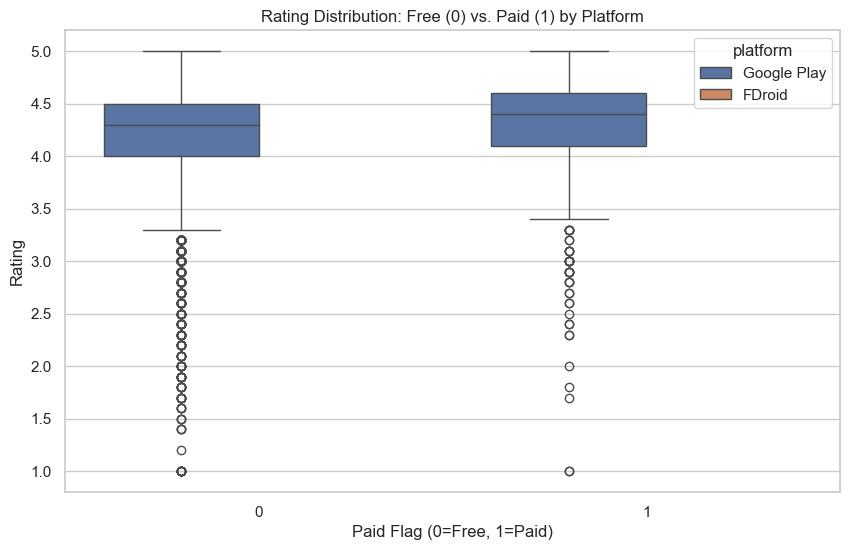

In [23]:
# Boxplot comparing ratings for Free vs. Paid apps, differentiated by platform
plt.figure(figsize=(10,6))
sns.boxplot(x='paid_flag', y='rating', hue='platform', data=df)
plt.title('Rating Distribution: Free (0) vs. Paid (1) by Platform')
plt.xlabel('Paid Flag (0=Free, 1=Paid)')
plt.ylabel('Rating')
plt.show()

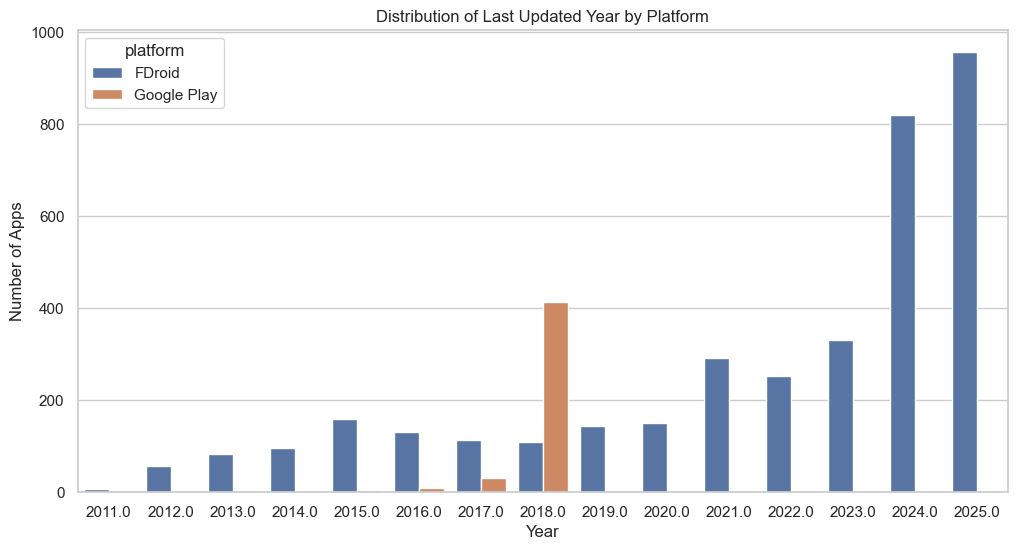

In [25]:
# Countplot for last_updated_year by platform
plt.figure(figsize=(12,6))
sns.countplot(x='last_updated_year', hue='platform', data=df)
plt.title('Distribution of Last Updated Year by Platform')
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.show()

## Save the Enhanced Dataset

After feature derivation, we save the enhanced dataset for further analysis.

In [28]:
output_path = 'data/combined/combined_apps_enhanced.csv'
df.to_csv(output_path, index=False)
print(f'Enhanced dataset saved to {output_path}')

Enhanced dataset saved to data/combined/combined_apps_enhanced.csv


## Conclusion

In this notebook, we have derived several new features from our combined dataset:
- **app_age_days** gives us a measure of how recently apps were updated.
- **installs_bin** categorizes apps by their install numbers for easier segmentation.
- **last_updated_year** and **last_updated_month** allow time-based analyses.
- **paid_flag** distinguishes free and paid apps.

These enhancements provide a richer dataset for our subsequent exploratory analysis, modeling, and visualization tasks.